# EDA and POC

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, accuracy_score

# Creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from IPython.core.display import display, HTML
import requests
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pickle


In [265]:
# Plots text color

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

text_color = 'white'

In [266]:
data = pd.read_csv('new_dataset.csv')

## 1. EDA

In [267]:
data.head(2)

,Title,Rating,Year,Month,Runtime,Budget,Income,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Top_50_Director,Lead,Supporting
0,Avatar: The Way of Water,7.8,2022,12,192,350000000.0,2.267947e+09,1,1,0,...,0,0,0,0,0,0,0,1,1,0
1,Guillermo del Toro's Pinocchio,7.6,2022,12,117,35000000.0,1.089670e+05,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [268]:
print(f'The dataset contains {data.shape[1]} columns and {data.shape[0]} rows')

The dataset contains 30 columns and 1641 rows


Text(0.5, 1.0, 'Correaltion Matrix for All Variables')

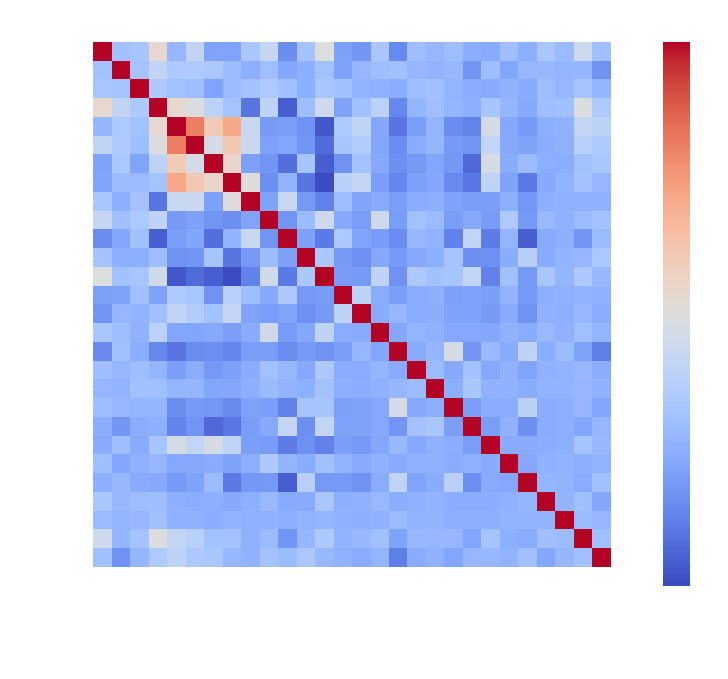

In [269]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correaltion Matrix for All Variables', color=text_color, fontsize=20, pad=20)

### 1.1. Ratings

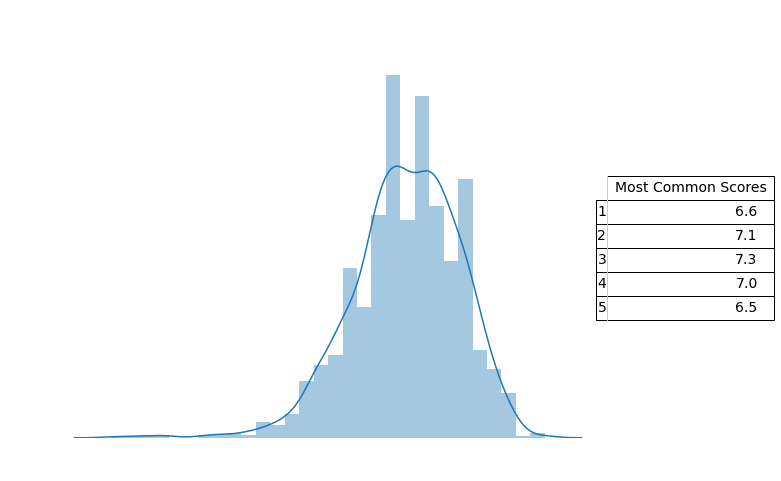

In [270]:
fig, ax = plt.subplots(figsize=(10,7))

# Plot
sns.distplot(data['Rating'], bins=30, kde=True)
plt.suptitle('Distribution of Movie Ratings', fontsize=20, color=text_color)
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Density', fontsize=15)

# Table
col_labels = ['Most Common Scores']
row_labels = ['1', '2', '3', '4', '5']
table_vals = [[6.6],[7.1],[7.3],[7.0],[6.5]]
table = ax.table(cellText=table_vals,
          colLabels=col_labels,
          rowLabels=row_labels,
          loc='right')

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(0.3, 2)

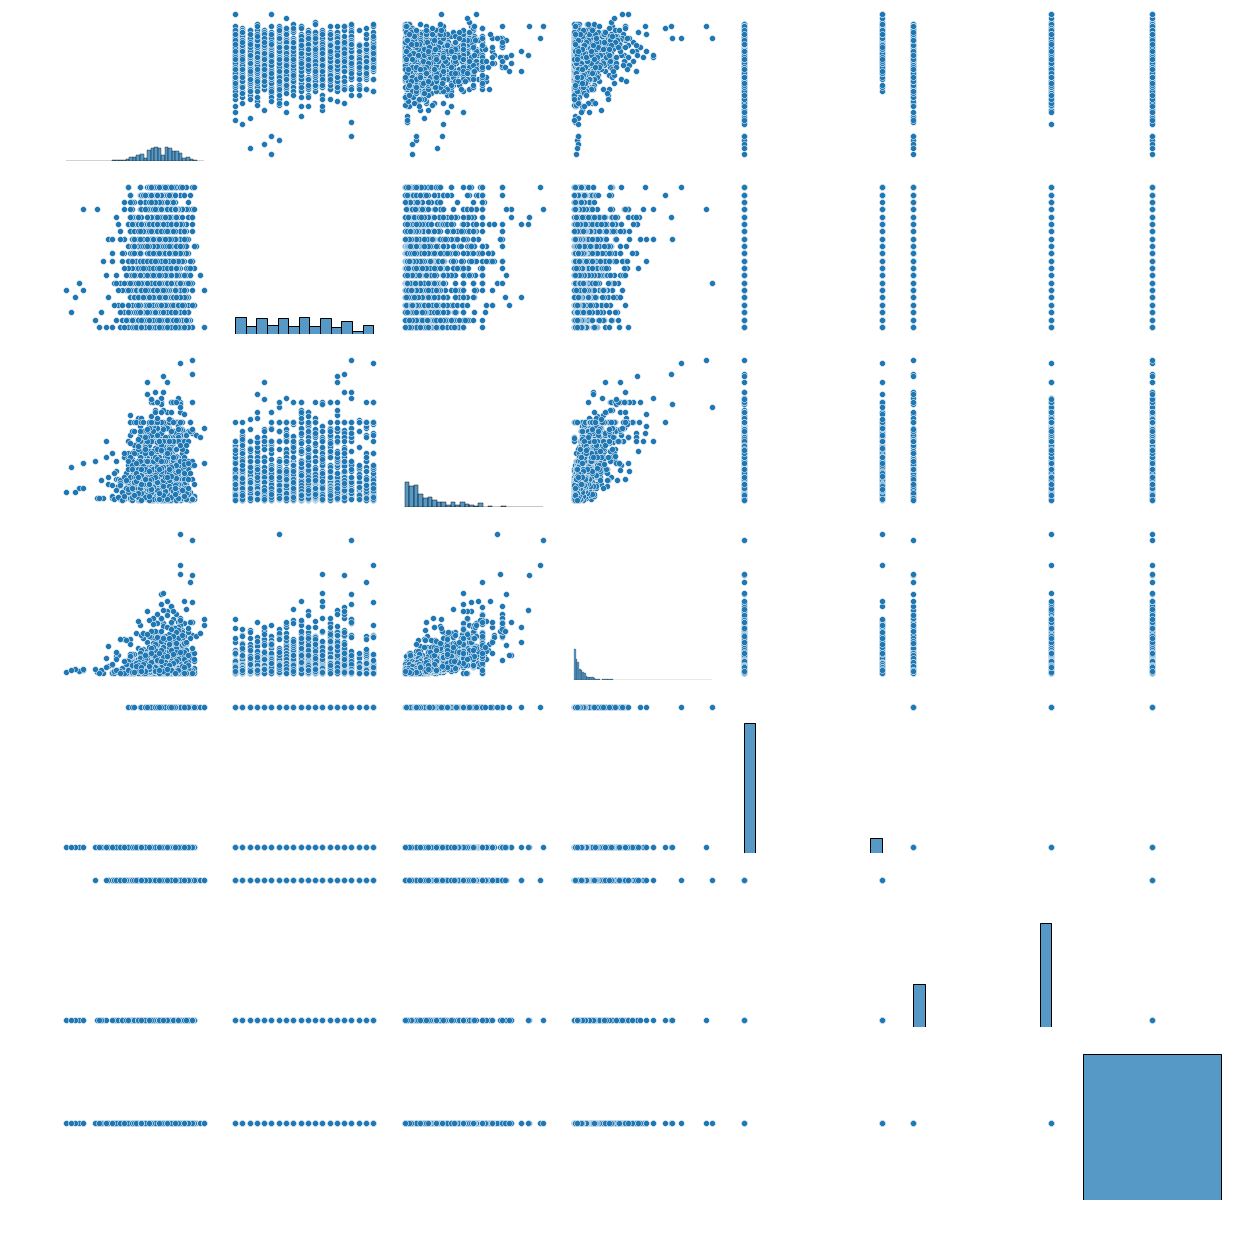

In [271]:
sns.pairplot(data=data, vars=['Rating', 'Year', 'Budget', 'Income', 'Top_50_Director', 'Lead', 'Supporting'])
plt.show()

### 1.2. Genre

Text(0.5, 1.0, 'Genres Correlation Matrix')

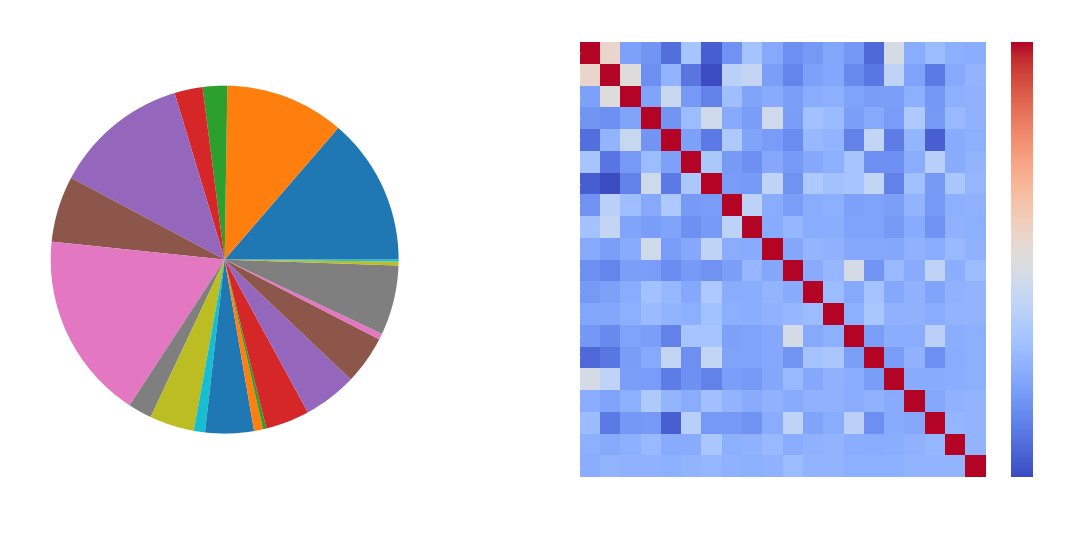

In [272]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# Selecting the Genre columns
genre_columns = data.columns[7:27]
df_pie = data[genre_columns]

# Pie chart for the genres
sums = df_pie.sum()
ax1.pie(sums, labels=sums.index,textprops={'color': text_color})
ax1.set_title('Genres Pie Chart', color=text_color, fontsize=20)

# Correlation matrix for the genres
corr_matrix = df_pie.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax2)
ax2.set_title('Genres Correlation Matrix', color=text_color, fontsize=20, pad=20)


### 1.3. Finances

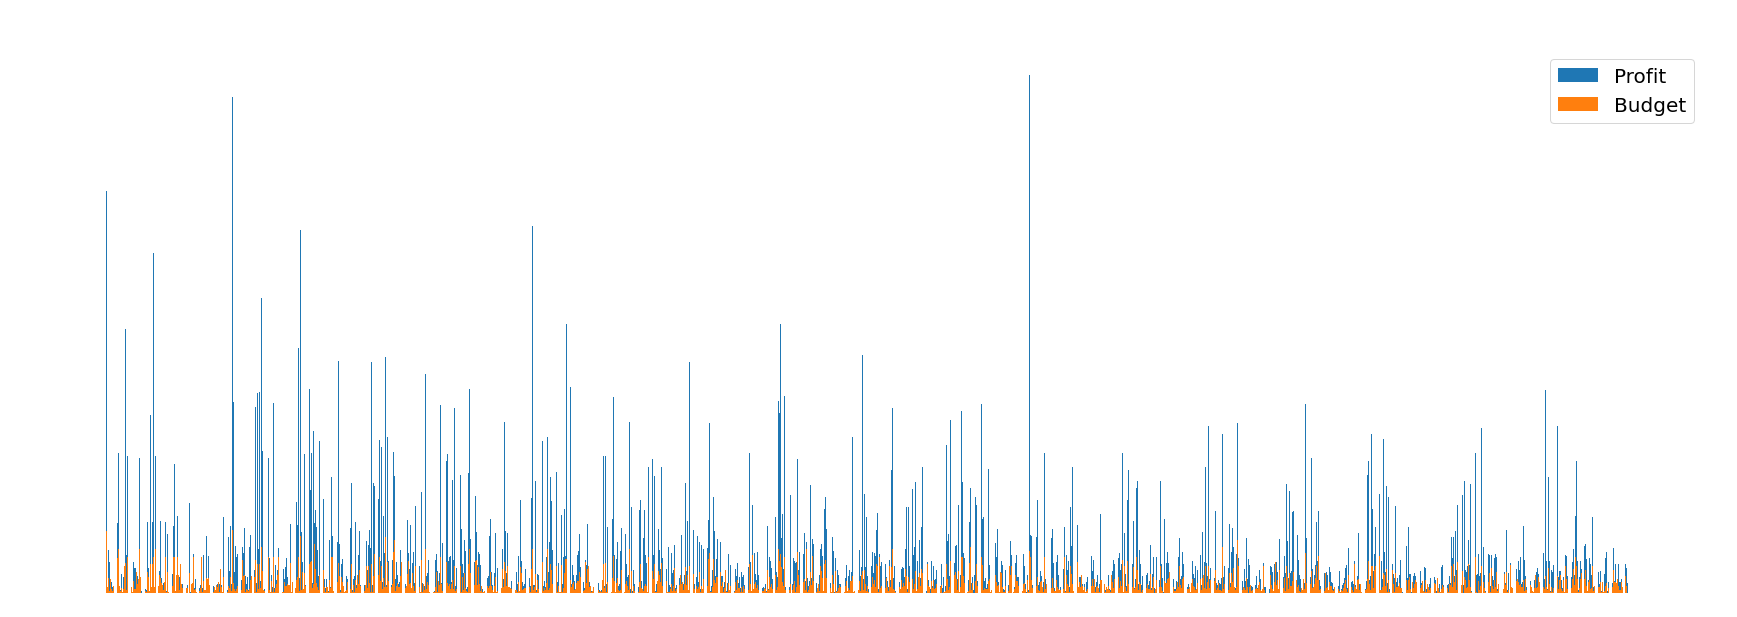

In [273]:
fig, ax = plt.subplots(figsize=(30,10))

# Pie chart for the genres
ax.bar(data['Title'], data['Income'], label='Profit')
ax.bar(data['Title'], data['Budget'], label='Budget')
ax.set_title('Budget vs. Profit', color=text_color, fontsize=30, pad=20)
ax.legend(loc='upper right', fontsize=20)

In [274]:
# Movies that made the highest profit
data['Profit'] = data['Income'] - data['Budget']
data_profit = data.sort_values('Profit', ascending=False)
print(data_profit[['Title', 'Profit']].head(10))


                                          Title        Profit
993                                      Avatar  2.685918e+09
135                           Avengers: Endgame  2.441501e+09
0                      Avatar: The Way of Water  1.917947e+09
458  Star Wars: Episode VII - The Force Awakens  1.824522e+09
209                      Avengers: Infinity War  1.727360e+09
50                      Spider-Man: No Way Home  1.717430e+09
467                              Jurassic World  1.521537e+09
167                               The Lion King  1.403250e+09
494                                   Furious 7  1.325341e+09
20                            Top Gun: Maverick  1.318733e+09


Text(0.5, 1.0, 'Correaltion Matrix for All Variables')

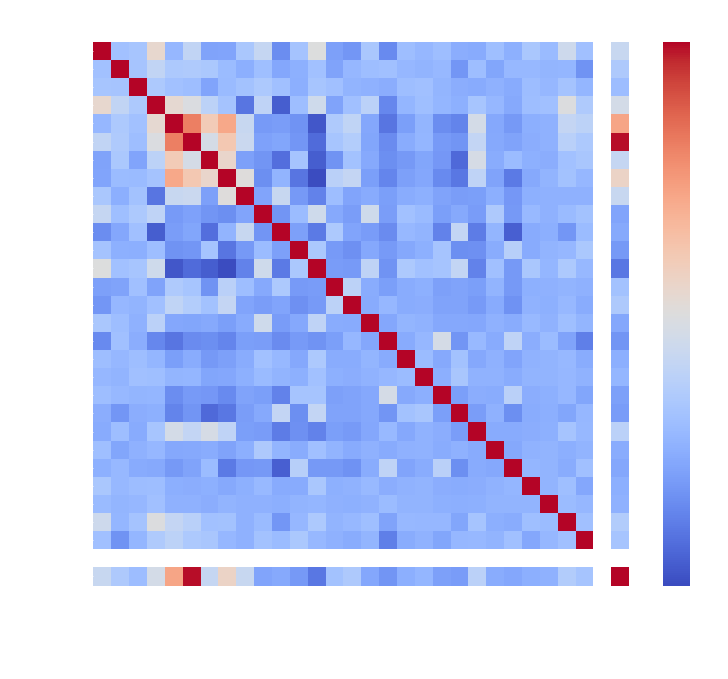

In [275]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correaltion Matrix for All Variables', color=text_color, fontsize=20, pad=20)

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1641 non-null   object 
 1   Rating           1641 non-null   float64
 2   Year             1641 non-null   int64  
 3   Month            1641 non-null   int64  
 4   Runtime          1641 non-null   int64  
 5   Budget           1641 non-null   float64
 6   Income           1641 non-null   float64
 7   Action           1641 non-null   int64  
 8   Adventure        1641 non-null   int64  
 9   Animation        1641 non-null   int64  
 10  Biography        1641 non-null   int64  
 11  Comedy           1641 non-null   int64  
 12  Crime            1641 non-null   int64  
 13  Drama            1641 non-null   int64  
 14  Family           1641 non-null   int64  
 15  Fantasy          1641 non-null   int64  
 16  History          1641 non-null   int64  
 17  Horror        

## 2. POC

In [277]:
# 1. Defining features and targets

features = [ 
    'Year', 
    'Month', 
    'Runtime',
    'Budget',
    'Income', 
    'Top_50_Director', 
    'Lead', 
    'Supporting'] + list(data.columns[7:27])

target = 'Rating'

In [278]:
# 2. Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [279]:
# 3.1. Training a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [280]:
# 3.2.
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [281]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [282]:
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

SVR()

In [283]:
# 4. Predicting the income on the test set
y_pred_lr = model_lr.predict(X_test)
y_pred_rfr = model_rfr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_svr = model_svr.predict(X_test)



In [284]:
# 5. Calculating the mean squared error of the predictions
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean squared error: {mse_lr}')

Mean squared error: 0.5603683866042226


In [285]:
# 5. Calculating the mean squared error of the predictions
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(f'Mean squared error: {mse_rfr}')

Mean squared error: 0.5819142887537995


In [286]:
# 5. Calculating the mean squared error of the predictions
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean squared error: {mse_dt}')

Mean squared error: 1.0207294832826748


In [287]:
# 5. Calculating the mean squared error of the predictions
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean squared error: {mse_svr}')

Mean squared error: 0.7550713264822658


In [288]:
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"F1 score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

NameError: name 'y_true' is not defined